In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')

In [2]:
# Merge datasets
order_customer_geolocation = customers.merge(orders, on='customer_id').merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
order_product_info = order_items.merge(products, on='product_id').merge(order_customer_geolocation, on='order_id').merge(payments, on='order_id', how='inner')
order_product_info

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,order_delivered_customer_date,order_estimated_delivery_date,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29,28013,-21.758076,-41.312633,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29,28013,-21.758843,-41.306754,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29,28013,-21.767046,-41.311328,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29,28013,-21.771661,-41.312119,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,2017-09-20 23:43:48,2017-09-29,28013,-21.763006,-41.306182,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218469,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,2018-06-14 17:56:26,2018-06-28,18605,-22.934277,-48.454793,botucatu,São Paulo,credit_card,1,55.79
17218470,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,2018-06-14 17:56:26,2018-06-28,18605,-22.910668,-48.442521,botucatu,São Paulo,credit_card,1,55.79
17218471,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,2018-06-14 17:56:26,2018-06-28,18605,-22.918155,-48.439639,botucatu,São Paulo,credit_card,1,55.79
17218472,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,2018-06-14 17:56:26,2018-06-28,18605,-22.906315,-48.444961,botucatu,São Paulo,credit_card,1,55.79


In [3]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'
    
order_product_info['product_category'] = order_product_info.product_category_name.apply(classify_cat)

In [4]:
order_product_info.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'payment_type',
       'payment_installments', 'payment_value', 'product_category'],
      dtype='object')

[4441810 4326199 2090139 2061398 1925700 1447037  517871  236976  167936]


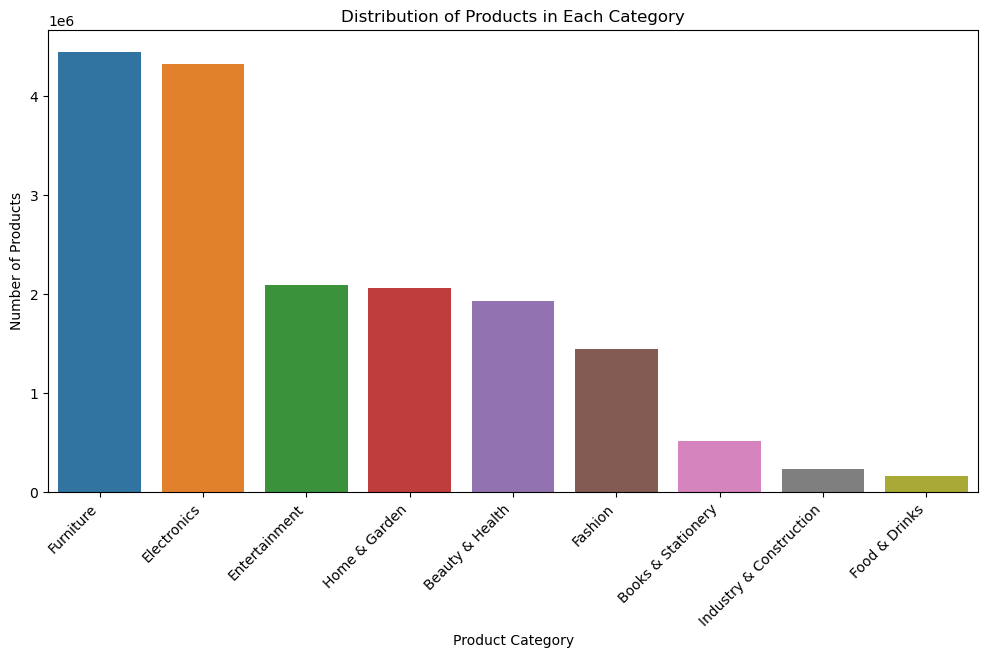

In [26]:
# Distribution of Products in Each Category
print(order_product_info.product_category.value_counts().values)

plt.figure(figsize=(12, 6))
sns.barplot(x=order_product_info.product_category.value_counts().index, y=order_product_info['product_category'].value_counts().values)
plt.title('Distribution of Products in Each Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

# overview of how many products are present in each category

product_category
Electronics                8.368081e+08
Furniture                  8.097616e+08
Home & Garden              3.206693e+08
Entertainment              3.156752e+08
Beauty & Health            3.115815e+08
Fashion                    2.289501e+08
Industry & Construction    7.213034e+07
Books & Stationery         6.268101e+07
Food & Drinks              3.492711e+07
Name: payment_value, dtype: float64


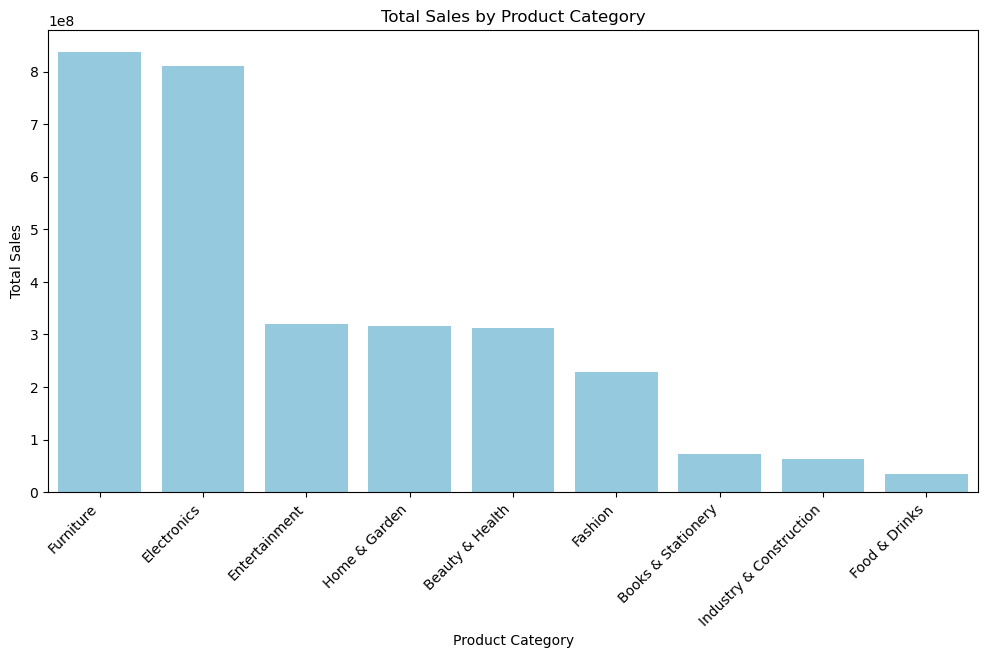

In [20]:
# Category-wise Total Sales 
# represent the total monetary value of sales

category_sales = order_product_info.groupby('product_category')['payment_value'].sum().sort_values(ascending=False)
print(category_sales)

plt.figure(figsize=(12, 6))
sns.barplot(x = order_product_info.product_category.value_counts().index, y = category_sales.values, color = 'skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
most_product = order_product_info.groupby('product_category').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
most_product.head()

,product_category,order_count
0,Furniture,4441810
1,Electronics,4326199
2,Entertainment,2090139
3,Home & Garden,2061398
4,Beauty & Health,1925700


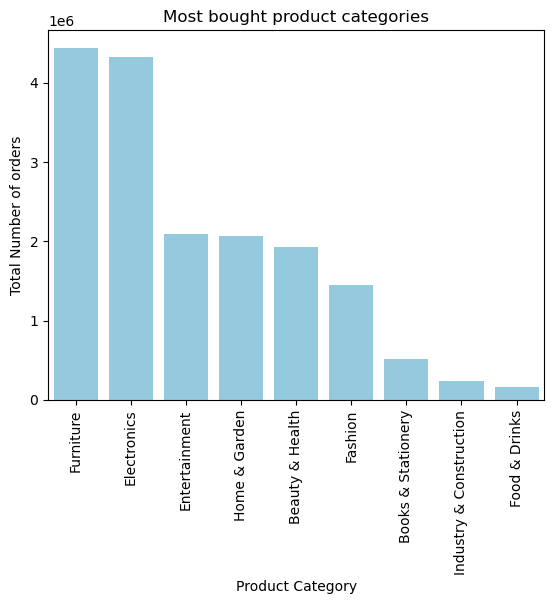

In [21]:
# Top 10 most bought product categories
# represent the number of orders

sns.barplot(x = order_product_info.product_category.value_counts().index, y = most_product.order_count.values, data = most_product[:] ,color = "skyblue")
plt.xlabel("Product Category")
plt.ylabel("Total Number of orders")
plt.title("Most bought product categories")
plt.xticks(rotation='vertical')
plt.show()

In [91]:
# To plot the top product categories of each location
# Group the data
top_category_per_location = order_product_info.groupby(['customer_city', 'customer_state', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'product_category'])['product_id'].count().reset_index()
top_category_per_location = top_category_per_location.sort_values('product_category', ascending=False).groupby('customer_city').head(1)

# Display the result
top_category_per_location

,customer_city,customer_state,customer_zip_code_prefix,geolocation_lat,geolocation_lng,product_category,product_id
236244,São Paulo,São Paulo,4812,-23.715187,-46.685218,Industry & Construction,3
1944708,niteroi,Rio de Janeiro,24230,-22.901501,-43.104295,Industry & Construction,1
1975427,nova iguacu,Rio de Janeiro,26263,-22.687146,-43.477138,Industry & Construction,1
1981483,nova lima,Minas Gerais,34011,-20.088616,-43.966657,Industry & Construction,1
1986113,nova santa rosa,Paraná,85930,-24.470869,-53.948416,Industry & Construction,2
...,...,...,...,...,...,...,...
2915194,sao pedro do butia,Rio Grande do Sul,97920,-28.124368,-54.891714,Beauty & Health,1
1990802,novais,São Paulo,15885,-20.995394,-48.916560,Beauty & Health,1
1072517,cotegipe,Bahia,47900,-11.733663,-44.254529,Beauty & Health,1
2207427,ponto belo,Espírito Santo,29885,-18.258618,-40.507950,Beauty & Health,1


In [92]:
import plotly.express as px
# library to plot a map

In [93]:
# plot scatter plot to display top product categories of each cities on a map
fig = px.scatter_geo(top_category_per_location,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     color='product_category',
                     custom_data=['customer_city', 'product_category'],
                     projection="natural earth",
                     title='Top Product Categories by Sales in Each City')

# Customize the layout and show the plot
fig.update_geos(showland=True, landcolor="#ECECEC", center=dict(lat=-14.235, lon=-51.9253), scope="south america", 
                projection_scale=1, showcoastlines=True)
# Adjust hover label appearance
fig.update_traces(textfont=dict(color='black', size=10), 
                  hovertemplate='<br>'.join([
                      '<b>%{customdata[0]}</b><br>',
                      'Latitude: %{lat:.2f}',
                      'Longitude: %{lon:.2f}',
                      'Product Category: %{customdata[1]}']),
                  hoverlabel=dict(align='left', bgcolor="white", 
                                  font=dict(color="black", size=12))                                )

fig.update_layout(title_text='Top Product Categories by Sales in Each City', margin=dict(l=0, r=10, t=40, b=40), height=600, width=700)
fig.show()

In [94]:
# display top product categories of each state on a map
# To plot the top product categories of each State
# Group the data
top_category_per_state = order_product_info.groupby(['customer_state', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'product_category'])['product_id'].count().reset_index()
top_category_per_state = top_category_per_location.sort_values('product_category', ascending=False).groupby('customer_state').head(1)

# Display the result
top_category_per_state

,customer_city,customer_state,customer_zip_code_prefix,geolocation_lat,geolocation_lng,product_category,product_id
236244,São Paulo,São Paulo,4812,-23.715187,-46.685218,Industry & Construction,3
1581001,itumbiara,Goiás,75513,-18.407069,-49.218690,Industry & Construction,1
1614593,japura,Paraná,87225,-23.475293,-52.557115,Industry & Construction,1
1614645,jaqueira,Pernambuco,55409,-8.727359,-35.795200,Industry & Construction,1
1614006,japeri,Rio de Janeiro,26433,-22.651408,-43.650490,Industry & Construction,1
1613676,januaria,Minas Gerais,39480,-15.473305,-44.369979,Industry & Construction,3
1357201,guapore,Rio Grande do Sul,99200,-28.829676,-51.932177,Industry & Construction,1
1351874,guamare,Rio Grande do Norte,59598,-5.106742,-36.319775,Industry & Construction,1
1456350,ilheus,Bahia,45661,-14.780972,-39.048856,Industry & Construction,1
1084977,criciuma,Santa Catarina,88802,-28.680569,-49.359722,Industry & Construction,1


In [95]:
top_category_per_state.product_category.unique()

array(['Industry & Construction', 'Home & Garden'], dtype=object)

In [96]:
# plot scatter plot to display top product categories of each state on a map
fig = px.scatter_geo(top_category_per_state,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     color='product_category',
                     custom_data=['customer_state', 'product_category'],
                     projection="natural earth",
                     title='Top Product Categories by Sales in Each State')

# Customize the layout and show the plot
fig.update_geos(showland=True, landcolor="#ECECEC", center=dict(lat=-14.235, lon=-51.9253), scope="south america", 
                projection_scale=1, showcoastlines=True)
# Adjust hover label appearance
fig.update_traces(textfont=dict(color='black', size=10), 
                  hovertemplate='<br>'.join([
                      '<b>%{customdata[0]}</b><br>',
                      'Latitude: %{lat:.2f}',
                      'Longitude: %{lon:.2f}',
                      'Product Category: %{customdata[1]}']),
                  hoverlabel=dict(align='left', bgcolor="white", 
                                  font=dict(color="black", size=12))                                )

fig.update_layout(title_text='Top Product Categories by Sales in Each State', margin=dict(l=0, r=10, t=40, b=40), height=600, width=700)
fig.show()

In [109]:
# Analyse the product categories for each year (2016-2018)
# convert'order_purchase_timestamp' to datetime format
order_product_info['order_purchase_timestamp'] = pd.to_datetime(order_product_info['order_purchase_timestamp'])

# Extract year from 'order_purchase_timestamp'
order_product_info['order_year'] = order_product_info['order_purchase_timestamp'].dt.year
# convert to datetime format
order_product_info['order_year'] = order_product_info['order_purchase_timestamp'].dt.year

In [110]:
order_product_info.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_id',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'payment_type',
       'payment_installments', 'payment_value', 'product_category',
       'order_year'],
      dtype='object')

In [111]:
order_product_info.order_year.unique()

array([2017, 2018, 2016], dtype=int64)

In [123]:
# Check the length of each component
print(len(order_product_info['product_category'].value_counts().index))
print(len(order_product_info['product_category'].value_counts().values))
print(len(order_product_info['order_year'].value_counts()))

# Print the first few rows of the DataFrame
order_product_info.head()

9
9
3


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_type,payment_installments,payment_value,product_category,order_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.758076,-41.312633,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.758843,-41.306754,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.767046,-41.311328,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.771661,-41.312119,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.763006,-41.306182,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017


In [127]:
# Filter data for the year 2016
order_product_info_2016 = order_product_info[order_product_info['order_year'] == 2016]

# Print the length of unique values in the "order_year" column
print(len(order_product_info_2016['order_id'].value_counts()))
print(len(order_product_info_2016['order_item_id'].value_counts()))
print(len(order_product_info_2016['product_id'].value_counts()))
order_product_info_2016

263
6
234


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_type,payment_installments,payment_value,product_category,order_year
1282484,3379d980824f0aa5dab057f2530759bb,1,33fac76e7f17367dedaef7954bbb33b4,56642bcb79900e777d68e91915cb4267,2016-10-16 04:01:59,72.0,15.90,health_beauty,550.0,20.0,...,86181,-23.281934,-51.285107,cambe,Paraná,boleto,1,87.90,Beauty & Health,2016
1282485,3379d980824f0aa5dab057f2530759bb,1,33fac76e7f17367dedaef7954bbb33b4,56642bcb79900e777d68e91915cb4267,2016-10-16 04:01:59,72.0,15.90,health_beauty,550.0,20.0,...,86181,-23.278679,-51.284115,cambe,Paraná,boleto,1,87.90,Beauty & Health,2016
1282486,3379d980824f0aa5dab057f2530759bb,1,33fac76e7f17367dedaef7954bbb33b4,56642bcb79900e777d68e91915cb4267,2016-10-16 04:01:59,72.0,15.90,health_beauty,550.0,20.0,...,86181,-23.278809,-51.296175,cambe,Paraná,boleto,1,87.90,Beauty & Health,2016
1282487,3379d980824f0aa5dab057f2530759bb,1,33fac76e7f17367dedaef7954bbb33b4,56642bcb79900e777d68e91915cb4267,2016-10-16 04:01:59,72.0,15.90,health_beauty,550.0,20.0,...,86181,-23.276963,-51.286940,cambe,Paraná,boleto,1,87.90,Beauty & Health,2016
1282488,3379d980824f0aa5dab057f2530759bb,1,33fac76e7f17367dedaef7954bbb33b4,56642bcb79900e777d68e91915cb4267,2016-10-16 04:01:59,72.0,15.90,health_beauty,550.0,20.0,...,86181,-23.280823,-51.281719,cambe,Paraná,boleto,1,87.90,Beauty & Health,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17138488,f9c44da06151c190a9a6c9c712873d10,1,b864b103180d5a6a3f830e67f93e8735,f5b84683a9bf9e1df748cf40f601b39c,2016-10-15 15:09:06,83.9,9.07,baby,600.0,70.0,...,5074,-23.521493,-46.705277,São Paulo,São Paulo,credit_card,5,92.97,Fashion,2016
17138489,f9c44da06151c190a9a6c9c712873d10,1,b864b103180d5a6a3f830e67f93e8735,f5b84683a9bf9e1df748cf40f601b39c,2016-10-15 15:09:06,83.9,9.07,baby,600.0,70.0,...,5074,-23.520700,-46.705664,São Paulo,São Paulo,credit_card,5,92.97,Fashion,2016
17138490,f9c44da06151c190a9a6c9c712873d10,1,b864b103180d5a6a3f830e67f93e8735,f5b84683a9bf9e1df748cf40f601b39c,2016-10-15 15:09:06,83.9,9.07,baby,600.0,70.0,...,5074,-23.520700,-46.705664,São Paulo,São Paulo,credit_card,5,92.97,Fashion,2016
17138491,f9c44da06151c190a9a6c9c712873d10,1,b864b103180d5a6a3f830e67f93e8735,f5b84683a9bf9e1df748cf40f601b39c,2016-10-15 15:09:06,83.9,9.07,baby,600.0,70.0,...,5074,-23.521099,-46.706778,São Paulo,São Paulo,credit_card,5,92.97,Fashion,2016


In [128]:
# Filter data for the year 2017
order_product_info_2017 = order_product_info[order_product_info['order_year'] == 2017]

# Print the length of unique values in the "order_year" column
print(len(order_product_info_2017['order_id'].value_counts()))
print(len(order_product_info_2017['order_item_id'].value_counts()))
print(len(order_product_info_2017['product_id'].value_counts()))
order_product_info_2017

42071
21
16273


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_type,payment_installments,payment_value,product_category,order_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.758076,-41.312633,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.758843,-41.306754,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.767046,-41.311328,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.771661,-41.312119,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,...,28013,-21.763006,-41.306182,campos dos goytacazes,Rio de Janeiro,credit_card,2,72.19,Fashion,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218362,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,2700.0,60.0,...,59955,-6.461630,-38.179823,tenente ananias,Rio Grande do Norte,credit_card,7,273.92,Entertainment,2017
17218363,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,2700.0,60.0,...,59955,-6.468115,-38.179947,tenente ananias,Rio Grande do Norte,credit_card,7,273.92,Entertainment,2017
17218364,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,2700.0,60.0,...,59955,-6.459858,-38.181420,tenente ananias,Rio Grande do Norte,credit_card,7,273.92,Entertainment,2017
17218365,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure,2700.0,60.0,...,59955,-6.466939,-38.180463,tenente ananias,Rio Grande do Norte,credit_card,7,273.92,Entertainment,2017


In [129]:
# Filter data for the year 2018
order_product_info_2018 = order_product_info[order_product_info['order_year'] == 2018]

# Print the length of unique values in the "order_year" column
print(len(order_product_info_2018['order_id'].value_counts()))
print(len(order_product_info_2018['order_item_id'].value_counts()))
print(len(order_product_info_2018['product_id'].value_counts()))
order_product_info_2018

51439
20
19750


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,...,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_type,payment_installments,payment_value,product_category,order_year
293,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,...,30720,-19.918025,-43.976133,belo horizonte,Minas Gerais,credit_card,2,83.23,Fashion,2018
294,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,...,30720,-19.909493,-43.975953,belo horizonte,Minas Gerais,credit_card,2,83.23,Fashion,2018
295,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,...,30720,-19.914200,-43.973202,belo horizonte,Minas Gerais,credit_card,2,83.23,Fashion,2018
296,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,...,30720,-19.908045,-43.978181,belo horizonte,Minas Gerais,credit_card,2,83.23,Fashion,2018
297,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,...,30720,-19.919861,-43.972480,belo horizonte,Minas Gerais,credit_card,2,83.23,Fashion,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218469,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,18605,-22.934277,-48.454793,botucatu,São Paulo,credit_card,1,55.79,Furniture,2018
17218470,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,18605,-22.910668,-48.442521,botucatu,São Paulo,credit_card,1,55.79,Furniture,2018
17218471,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,18605,-22.918155,-48.439639,botucatu,São Paulo,credit_card,1,55.79,Furniture,2018
17218472,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,bed_bath_table,600.0,30.0,...,18605,-22.906315,-48.444961,botucatu,São Paulo,credit_card,1,55.79,Furniture,2018


In [ ]:
# visualisation for comparing the product categories of all the years

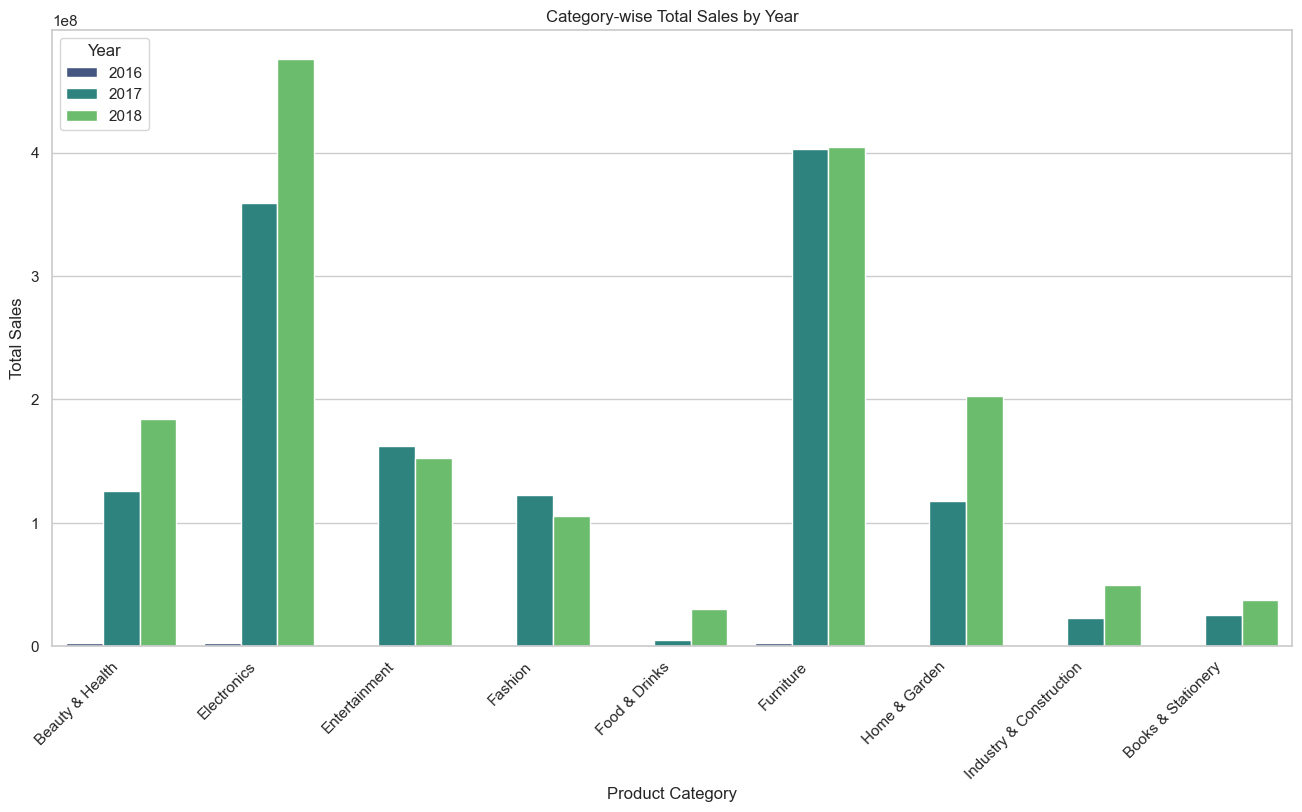

In [137]:
# Category-wise Total Sales
category_sales = order_product_info.groupby(['order_year', 'product_category'])['payment_value'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='product_category', y='payment_value', hue='order_year', data=category_sales, palette='viridis')
plt.title('Category-wise Total Sales by Year')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.show()

In [145]:
category_sales

,order_year,product_category,payment_value
0,2016,Beauty & Health,2.106388e+06
1,2016,Electronics,2.144303e+06
2,2016,Entertainment,1.106242e+06
3,2016,Fashion,8.928704e+05
4,2016,Food & Drinks,1.886108e+04
5,2016,Furniture,2.079735e+06
6,2016,Home & Garden,7.869023e+05
7,2016,Industry & Construction,5.489779e+04
8,2017,Beauty & Health,1.252772e+08
9,2017,Books & Stationery,2.544330e+07


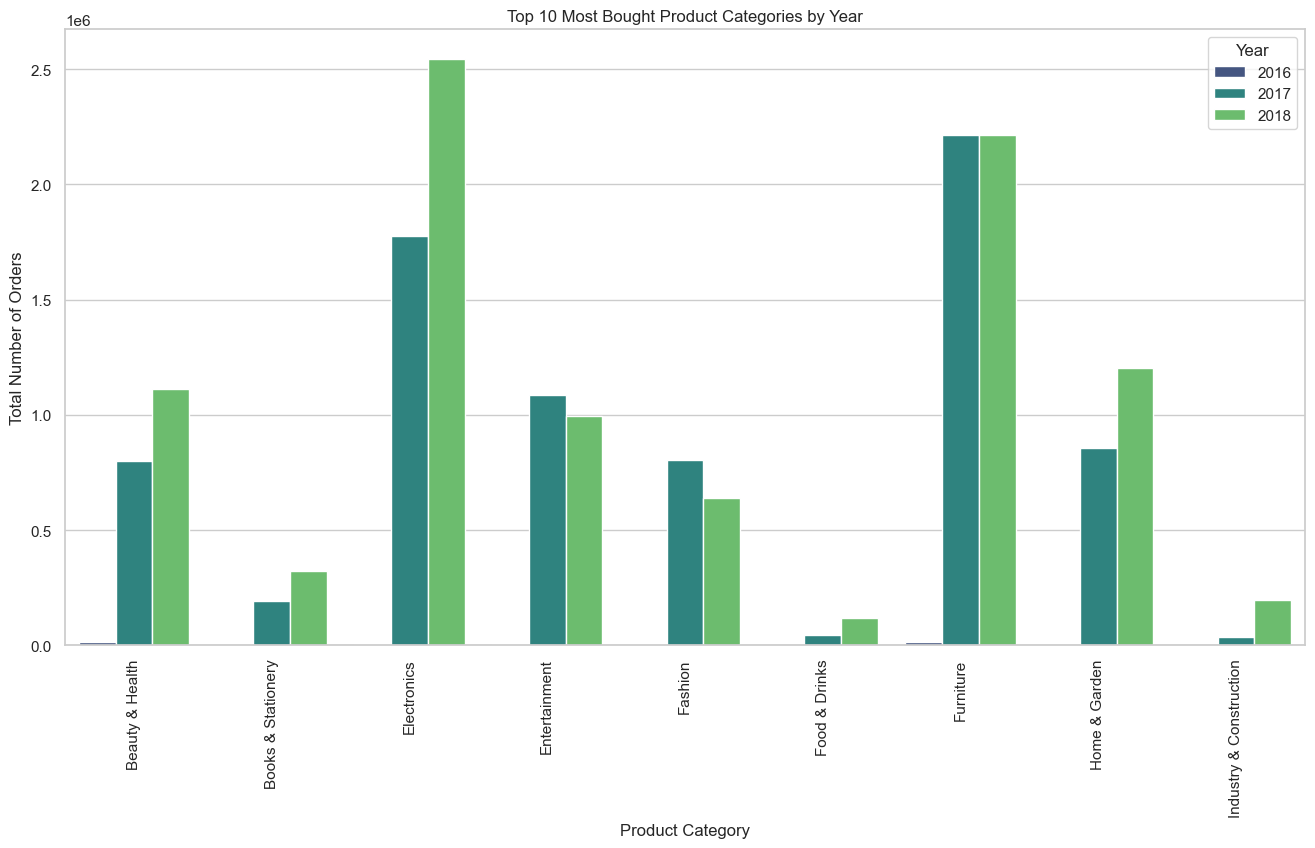

In [143]:
# Top 10 most bought product categories
most_product = order_product_info.groupby(['order_year', 'product_category']).size().reset_index(name='order_count')
most_product = most_product.groupby(['order_year', 'product_category'])['order_count'].sum().reset_index()
most_product = most_product.groupby('product_category').apply(lambda x: x.nlargest(10, 'order_count')).reset_index(drop=True)

plt.figure(figsize=(16, 8))
sns.barplot(x='product_category', y='order_count', hue='order_year', data=most_product, palette='viridis')
plt.title('Top 10 Most Bought Product Categories by Year')
plt.xlabel('Product Category')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation='vertical')
plt.legend(title='Year')
plt.show()

In [144]:
most_product

,order_year,product_category,order_count
0,2018,Beauty & Health,1110404
1,2017,Beauty & Health,801838
2,2016,Beauty & Health,13458
3,2018,Books & Stationery,323826
4,2017,Books & Stationery,194045
5,2018,Electronics,2544551
6,2017,Electronics,1773751
7,2016,Electronics,7897
8,2017,Entertainment,1087185
9,2018,Entertainment,996374


In [ ]:
# Based on location - city

In [146]:
import plotly.express as px

# Group the data for each year
top_category_per_location_per_year = order_product_info.groupby(['order_year', 'customer_city', 'customer_state', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'product_category'])['product_id'].count().reset_index()
top_category_per_location_per_year = top_category_per_location_per_year.sort_values('product_category', ascending=False).groupby(['order_year', 'customer_city']).head(1)

# Display the result
top_category_per_location_per_year


,order_year,customer_city,customer_state,customer_zip_code_prefix,geolocation_lat,geolocation_lng,product_category,product_id
3119980,2018,felixlandia,Minas Gerais,39237,-18.753770,-44.898727,Industry & Construction,2
2548104,2018,artur nogueira,São Paulo,13160,-22.576373,-47.163499,Industry & Construction,1
3309615,2018,itabirito,Minas Gerais,35450,-20.243605,-43.798742,Industry & Construction,1
4498792,2018,teofilo otoni,Minas Gerais,39801,-17.866380,-41.480898,Industry & Construction,6
3709804,2018,osasco,São Paulo,6250,-23.499441,-46.800307,Industry & Construction,2
...,...,...,...,...,...,...,...,...
4155220,2018,ritapolis,Minas Gerais,36335,-21.019034,-44.321360,Beauty & Health,1
4153579,2018,rio tinto,Paraíba,58297,-6.805601,-35.078394,Beauty & Health,1
4151189,2018,rio maria,Pará,68530,-7.312678,-50.046398,Beauty & Health,2
3681599,2018,nova resende,Minas Gerais,37860,-21.119922,-46.421660,Beauty & Health,2


In [147]:
# Plot scatter plot to display top product categories of each city for each year on a map
fig = px.scatter_geo(top_category_per_location_per_year,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     color='product_category',
                     custom_data=['customer_city', 'product_category'],
                     animation_frame='order_year',  # Animation by year
                     projection="natural earth",
                     title='Top Product Categories by Sales in Each City (Year-wise)')

# Customize the layout and show the plot
fig.update_geos(showland=True, landcolor="#ECECEC", center=dict(lat=-14.235, lon=-51.9253), scope="south america", 
                projection_scale=1, showcoastlines=True)
# Adjust hover label appearance
fig.update_traces(textfont=dict(color='black', size=10), 
                  hovertemplate='<br>'.join([
                      '<b>%{customdata[0]}</b><br>',
                      'Latitude: %{lat:.2f}',
                      'Longitude: %{lon:.2f}',
                      'Product Category: %{customdata[1]}']),
                  hoverlabel=dict(align='left', bgcolor="white", 
                                  font=dict(color="black", size=12)))

fig.update_layout(title_text='Top Product Categories by Sales in Each City (Year-wise)', margin=dict(l=0, r=10, t=40, b=40), height=600, width=700)
fig.show()


In [ ]:
# Based on location - state

In [148]:
# Group the data for each year
top_category_per_state_per_year = order_product_info.groupby(['order_year', 'customer_state', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'product_category'])['product_id'].count().reset_index()
top_category_per_state_per_year = top_category_per_location_per_year.sort_values('product_category', ascending=False).groupby(['order_year', 'customer_state']).head(1)

# Display the result
top_category_per_state_per_year


,order_year,customer_city,customer_state,customer_zip_code_prefix,geolocation_lat,geolocation_lng,product_category,product_id
3119980,2018,felixlandia,Minas Gerais,39237,-18.753770,-44.898727,Industry & Construction,2
1356442,2017,ouricuri,Pernambuco,56200,-7.894359,-40.079536,Industry & Construction,1
2204013,2018,São Bernardo do Campo,São Paulo,9725,-23.693820,-46.558860,Industry & Construction,1
4594878,2018,viamao,Rio Grande do Sul,94440,-30.087041,-51.057922,Industry & Construction,2
1048018,2017,itumbiara,Goiás,75533,-18.409284,-49.241129,Industry & Construction,2
...,...,...,...,...,...,...,...,...
28265,2016,vila velha,Espírito Santo,29122,-20.334230,-40.308821,Furniture,1
10348,2016,ibimirim,Pernambuco,56580,-8.543315,-37.690502,Entertainment,1
12964,2016,maceio,Alagoas,57017,-9.663457,-35.743878,Electronics,1
4401,2016,boa vista,Roraima,69309,2.811222,-60.704965,Beauty & Health,1


In [149]:
# Plot scatter plot to display top product categories of each city for each year on a map
fig = px.scatter_geo(top_category_per_state_per_year,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     color='product_category',
                     custom_data=['customer_state', 'product_category'],
                     animation_frame='order_year',  # Animation by year
                     projection="natural earth",
                     title='Top Product Categories by Sales in Each State (Year-wise)')

# Customize the layout and show the plot
fig.update_geos(showland=True, landcolor="#ECECEC", center=dict(lat=-14.235, lon=-51.9253), scope="south america", 
                projection_scale=1, showcoastlines=True)
# Adjust hover label appearance
fig.update_traces(textfont=dict(color='black', size=10), 
                  hovertemplate='<br>'.join([
                      '<b>%{customdata[0]}</b><br>',
                      'Latitude: %{lat:.2f}',
                      'Longitude: %{lon:.2f}',
                      'Product Category: %{customdata[1]}']),
                  hoverlabel=dict(align='left', bgcolor="white", 
                                  font=dict(color="black", size=12)))

fig.update_layout(title_text='Top Product Categories by Sales in Each State (Year-wise)', margin=dict(l=0, r=10, t=40, b=40), height=600, width=700)
fig.show()
